## Data Precessing

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [2]:
bank = pd.read_excel('C:/Users/HP/Downloads/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [3]:
bank.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [4]:
bank.columns

Index(['Date', 'Stars', 'Reviews', 'BankName'], dtype='object')

In [5]:
bank.drop(columns = ['Date' , 'BankName'] , inplace = True)

In [8]:
bank['positive'] = np.where(bank.Stars > 3 , 1 , 0)

In [9]:
bank['negative'] = np.where(bank.Stars < 3 , 1 , 0)

In [10]:
bank['neutral'] = np.where(bank.Stars == 3 , 1 , 0)

In [11]:
bank.head()

,Stars,Reviews,positive,negative,neutral
0,5,"Great job, Wyndham Capital! Each person was pr...",1,0,0
1,5,Matthew Richardson is professional and helpful...,1,0,0
2,5,We had a past experience with Wyndham Mortgage...,1,0,0
3,5,We have been dealing with Brad Thomka from the...,1,0,0
4,5,I can't express how grateful I am for the supp...,1,0,0


In [12]:
bank.shape

(505, 5)

In [13]:
X = bank.Reviews
y = bank.Stars

In [14]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [15]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

In [16]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [17]:
X[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [18]:
corpus[1]

'matthew richardson is professional and helpful he helped us find the correct product for our mortgage thank you very much for the excellent service matthew '

In [19]:
# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.01, max_df = 0.9)
X = vectorizer.fit_transform(corpus).toarray()

In [20]:
X.shape

(505, 765)

In [21]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=.3,
                                              random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#Evelution of train and test accuracy
from sklearn import metrics


train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy:  0.9150141643059491
test_accuracy:  0.8552631578947368


Text(0.5, 15.0, 'Predicted label')

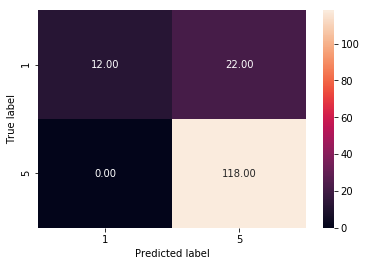

In [24]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x))
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
#Concatenating final prediction with original data set(all obersvations):

pred_stars=pd.DataFrame(logreg.predict(X),columns=['predicted_stars'])
  
test = pd.concat([bank, pred_stars], axis=1)

test.head(25)

,Stars,Reviews,positive,negative,neutral,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",1,0,0,5
1,5,Matthew Richardson is professional and helpful...,1,0,0,5
2,5,We had a past experience with Wyndham Mortgage...,1,0,0,5
3,5,We have been dealing with Brad Thomka from the...,1,0,0,5
4,5,I can't express how grateful I am for the supp...,1,0,0,5
5,5,I had the pleasure of working with Wyndham Cap...,1,0,0,5
6,5,My experience with Mattison was beyond greatly...,1,0,0,5
7,5,Patrick answered all my questions by email imm...,1,0,0,5
8,5,I loved working with this group of people! The...,1,0,0,5
9,5,Great web interface for both the loan applicat...,1,0,0,5


## Segmentation

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [27]:
# Creating a kmeans model

model = KMeans(n_clusters=6, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)

In [28]:
# applying the model on this prepared data

res = model.fit(train_x)
res

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [29]:
# Getting the vocalbulary
# Firstly, set of words from the tf-idf itself

vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

In [30]:
vocab

array(['10', '100', '12', '25', '30', 'aaron', 'able', 'about', 'above',
       'absolutely', 'accept', 'account', 'accurate', 'across', 'actual',
       'adam', 'adan', 'additional', 'advice', 'after', 'again', 'agent',
       'ago', 'agreed', 'alex', 'all', 'almost', 'along', 'already',
       'also', 'always', 'am', 'amazing', 'american', 'amount', 'an',
       'and', 'annoyed', 'another', 'answer', 'answered', 'answering',
       'answers', 'antebellum', 'anthony', 'any', 'anyone', 'anything',
       'application', 'apply', 'appraisal', 'appraiser', 'appreciate',
       'appreciated', 'approval', 'approved', 'are', 'around', 'as',
       'ask', 'asked', 'asking', 'asset', 'assurance', 'at', 'attention',
       'attentive', 'attorney', 'available', 'away', 'awesome', 'back',
       'bad', 'bank', 'banker', 'banks', 'barrett', 'based', 'be', 'beat',
       'became', 'because', 'been', 'before', 'begin', 'beginning',
       'being', 'believe', 'beneficial', 'best', 'better', 'beyond',

In [31]:
# Then, the cluster centers from the model fit that we stored on res

cluster_centers = np.array(res.cluster_centers_)

In [32]:
res.cluster_centers_[0].argsort()

array([393, 268,  53, 361, 360, 746, 473, 357, 405, 582, 198, 690,  95,
       188, 453, 206, 148, 624, 119, 375, 334, 671, 220, 408, 572, 702,
       638,  52, 498, 355, 174,  69, 124, 236, 127, 347,  18, 102, 364,
       637, 603, 414, 583,  70, 212, 175, 341,  24,  91, 135, 735, 391,
       162, 274, 751, 618, 691,  55,  74, 701, 374, 716, 721, 589, 601,
       567, 693, 524, 387, 562, 494, 237, 509, 646,   2, 530, 452, 667,
        16, 507,  23, 434, 329, 612, 696, 704, 134, 277, 203, 532, 167,
       718, 333, 179, 644, 640, 714, 437,  77, 156, 390, 105, 523, 436,
       676, 275, 622, 556, 485, 683, 207, 689, 291, 432, 699, 298, 626,
       265, 698, 526,  41, 758, 101, 155, 461, 475, 384, 484, 398, 149,
         1, 307,  42, 204, 694,  65, 738, 137, 565, 533, 481, 321, 293,
       418,  14,  87, 558, 641, 322, 518, 633,   8, 535, 350, 537, 430,
        93, 122, 241, 470, 456, 500, 276, 295, 571,  43, 496, 151, 292,
       133, 121,  51, 506,  62,  54, 499, 464, 363, 152, 486, 23

In [33]:
# sorting the cluster centers

sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [34]:
words=set()
for i in range(len(res.cluster_centers_)):
    words = set(vocab[sorted_vals[i][-10:]])
    print(words)

{'and', 'the', 'in', 'that', 'not', 'loan', 'of', 'to', 'was', 'my'}
{'helpful', 'and', 'very', 'to', 'was', 'customer', 'done', 'he', 'our', 'able'}
{'with', 'easy', 'the', 'and', 'service', 'to', 'was', 'work', 'process', 'great'}
{'with', 'we', 'the', 'and', 'alex', 'you', 'to', 'was', 'for', 'our'}
{'and', 'the', 'we', 'of', 'to', 'was', 'us', 'for', 'he', 'our'}
{'with', 'and', 'the', 'on', 'to', 'was', 'my', 'for', 'me', 'he'}


In [35]:
words=list(words)

In [60]:
# number of observations are in each cluster

bank['cluster'] = pd.Series(model.labels_)
bank.groupby('cluster').count()

,Stars,Reviews,positive,negative,neutral
cluster,,,,,
0.0,98,98,98,98,98
1.0,45,45,45,45,45
2.0,82,82,82,82,82
3.0,35,35,35,35,35
4.0,46,46,46,46,46
5.0,47,47,47,47,47


In [61]:
#Looking at the clusters with the help of their mean

bank.groupby('cluster').mean()

,Stars,positive,negative,neutral
cluster,,,,
0.0,4.183673,0.795918,0.204082,0.0
1.0,4.644444,0.911111,0.088889,0.0
2.0,4.317073,0.829268,0.170732,0.0
3.0,4.200000,0.800000,0.200000,0.0
4.0,4.391304,0.847826,0.152174,0.0
5.0,4.319149,0.829787,0.170213,0.0


Getting 0 in neutral column because we have zero records where Stars = 3

In [40]:
# training a LDA Model

from sklearn import decomposition

lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(train_x)
topic_word = lda_model.components_ 
vocab = vectorizer.get_feature_names()

In [41]:
# viewing the topic models

n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['previous capital but our accurate reliance really kind appraisal absolutely',
 'efficient friendly and the was us professional best date responded',
 'and the to was with we he of my very',
 'knew adan monthly was and informed my where kory appraisal',
 'making the amazing we and our to nasb home with',
 'bad the to and them was that they very fast',
 'timely and industry dean helpful very the joey they our',
 'the and our knowledgeable process were little options too really',
 'jeremy local consider non involved usually trusted don knowledge exceeded',
 'responsive awesome informative very helpful and surprises guy good no']